# Proceso de comprensión y preparación de datos

## Recogida, comprensión y evaluación de calidad de datos
Un problema que se identificó a priori es que el tipo de dato de SDG en el test set es float, cuando debería ser int. Por otro lado, hay muchos caracteres especiales que deben ser tratados.

In [1]:
import pandas as pd
import re
from sklearn.svm import SVC
import chardet
from num2words import num2words
import spacy
pd.set_option('display.max_rows', None)

# Mostrar todo el contenido de las celdas, sin truncar
pd.set_option('display.max_colwidth', None)

file1 = 'ODScat_345.csv' 
file2 = 'TestODScat_345.csv'  

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# Functions
def find_unusual_characters(df, column_name):
    all_text = ' '.join(df[column_name].astype(str))
    unusual_chars = re.findall(r'[^\w\s,.!?;:\-()\'"]', all_text)
    return set(unusual_chars)

# Understanding
print("First few rows of training set:")
display(df1.head())

print("First few rows of test set:")
display(df2.head())

print("\nShape of training set:", df1.shape)

print("Shape of validation set:", df2.shape)

print("\nInfo for training set:")
df1.info()
print("\nInfo for validation set:")
df2.info()

print("\nDescriptive statistics for training set:")
display(df1.describe(include='all')) 

print("\nDescriptive statistics for validation set:")
display(df2.describe(include='all'))

print("\nBasic statistics for natural_text length in training set:")
display(df1['Textos_espanol'].str.len().describe())

print("\nBasic statistics for natural_text length in validation set:")
display(df2['Textos_espanol'].str.len().describe())

print("Distribution of SDG categories in training set:")
distribution_file1 = df1['sdg'].value_counts()
display(distribution_file1)

print("\nDistribution of SDG categories in test set:")
distribution_file2 = df2['sdg'].value_counts()
display(distribution_file2)

print("\nUnusual characters in training set:")
unusual_chars_file1 = find_unusual_characters(df1, 'Textos_espanol')
display(unusual_chars_file1)

print("\nUnusual characters in validation set:")
unusual_chars_file2 = find_unusual_characters(df2, 'Textos_espanol')
display(unusual_chars_file2)

# Consistency
print("\nColumn names in training set:", df1.columns.tolist())
print("Column names in test:", df2.columns.tolist())

print("\nData types in training set:")
display(df1.dtypes)

print("Data types in test set:")
display(df2.dtypes)

# Uniqueness
print("Checking for duplicated rows within each file...\n")

duplicates_file1 = df1[df1.duplicated()]
print(f"Number of duplicated rows in training set: {len(duplicates_file1)}")
display(duplicates_file1)

duplicates_file2 = df2[df2.duplicated()]
print(f"Number of duplicated rows in test set: {len(duplicates_file2)}")
display(duplicates_file2)

print("\nChecking for common rows between file1 and file2...")

common_rows = pd.merge(df1, df2, how='inner')
print(f"Number of common rows between file1 and file2: {len(common_rows)}")
display(common_rows)

if len(common_rows) > 0:
    print("\nCommon rows found in both files:")
    display(common_rows)
else:
    print("\nNo common rows found in both files.")

# Missing values
print("\nMissing values in training set:")
display(df1.isnull().sum())

print("Missing values in validation set:")
display(df2.isnull().sum())

# Validity
print("\nUnique labels in test set:")
display(df1['sdg'].unique())

print("Unique labels in validation set:")
display(df2['sdg'].unique())


First few rows of training set:


,Textos_espanol,sdg
0,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3
3,"Por ejemplo, el estado australiano de Victoria creó una agencia de promoción de la salud financiada con los impuestos sobre el tabaco, y varios estados de EE.UU. (California, Massachusetts, Arizona y Oregón) han destinado parte de los ingresos procedentes de los impuestos especiales sobre el tabaco a actividades de educación y control del tabaco, mientras que en Nueva Jersey, Ohio y Texas los ingresos procedentes del alcohol se utilizan para programas de educación y prevención relacionados con el alcohol (Sassi et al., 2004), Los impuestos locales pueden ser una fuente importante de ingresos, sobre todo en los sistemas sanitarios descentralizados (por ejemplo, Dinamarca, Finlandia, Italia y Suecia)17 . Además, el nivel de los impuestos locales puede fijarse en función de las preferencias locales sobre el nivel y la calidad de los servicios médicos. Sin embargo, en ausencia de un mecanismo de transferencia ajustado al riesgo y gestionado centralmente, la descentralización reduce la mancomunación de riesgos y podría dar lugar a mayores disparidades sanitarias interregionales.",3
4,"El consumo anual de alcohol se estima en 15,7 litros al año para los hombres, más de un 50% por encima de la media de la OCDE (10,4) (Sistema mundial de información sobre alcohol y salud de la OMS), lo que puede ayudar a explicar la

First few rows of test set:


,Textos_espanol,sdg
0,"Han examinado la contribuciÃ³n de las universidades y las instituciones de educaciÃ³n terciaria al desarrollo del capital humano y las competencias, la transferencia de tecnologÃa y la innovaciÃ³n empresarial, el desarrollo social, cultural y medioambiental, y la creaciÃ³n de capacidad regional. El proceso de revisiÃ³n ha facilitado la creaciÃ³n de asociaciones en ciudades y regiones al reunir a instituciones de educaciÃ³n terciaria y organismos pÃºblicos y privados para identificar objetivos estratÃ©gicos y trabajar juntos para alcanzarlos. Complementa las revisiones que se han llevado a cabo en la región transfronteriza México-Estados Unidos, de gran importancia estratégica y económica, como las de Nuevo León, la región Paso del Norte y, más recientemente, la del sur de Arizona (2011), junto al estado de Sonora.",NaN
1,"En la última década, y en particular desde 2010, el número de altas per cápita ha tendido a disminuir, y ahora está en línea con la media de la OCDE mencionada anteriormente. Por ejemplo, los habitantes de zonas rurales representan el 43% de la población, pero sólo el 32% de las altas hospitalarias. A falta de información complementaria, no es posible determinar si esta diferencia indica o no disparidades en el acceso de las poblaciones rurales y, en caso afirmativo, si las causas son geográficas, culturales o infraestructurales. No parece que se recojan datos sobre el acceso a la atención desde el punto de vista del paciente, lo que ayudaría a comprender la naturaleza de los obstáculos al acceso (y las soluciones). En general, no es posible determinar con los datos disponibles si los ingresos o las características socioeconómicas de los pacientes influyen a la hora de llegar a las puertas del hospital o de ser ingresado. El acceso desigual probablemente se deba también a la incapacidad de los centros de las distintas regiones para prestar los mismos servicios.",NaN
2,"¿En qué países los estudiantes de alto rendimiento se sienten atraídos por la docencia? Las encuestas de docentes en servicio a menudo muestran que los maestros actuales están muy motivados por los beneficios intrínsecos de la enseñanza: trabajar con niños y ayudarlos a desarrollarse y hacer una contribución a la sociedad, mientras que los estudios que encuestan a grandes grupos de graduados sobre sus opciones de carrera muestran que la los salarios relativos de las ocupaciones de los graduados juegan un papel en sus elecciones: si los salarios de los docentes hubieran sido más altos, más ""docentes potenciales"" habrían considerado seriamente una carrera en la enseñanza. A nivel de país, los resultados indican que tanto los salarios de los docentes como la estatus social de la profesión docente se asocian positivamente con las expectativas de los estudiantes de trabajar como docentes.",NaN
3,"A raíz de su preocupación por el hecho de que los médicos de todo el sistema sanitario japonés no fueran capaces de identificar los signos de sufrimiento psicológico que podrían ayudar a reducir los suicidios, la Asociación Médica Japonesa informa de que empezó a compartir información y orientaciones sobre la depresión con todos los médicos, primero en 2004 y luego de nuevo en 2009. En la actualidad, sólo se recogen indicadores sobre la tasa de reclusión y contención, y de ingresos involuntarios, por parte de los proveedores y a nivel prefectural. La información recopilada sistemáticamente sobre el sistema de atención de salud mental se limita a indicadores estructurales: instalaciones, número de personal, número de camas.",NaN
4,"1999|H5|, Ares Abalde, 2014[ij]. El pequeño número de estudiantes y docentes en estas escuelas da forma a las formas en que las escuelas pueden utilizar el tiempo de docentes y alumnos, y cómo estos se agrupan por grados y habilidades (Mulcahy, 2009[ii6i). Los padres pueden estar preocupados por el hecho de que sus hijos aprendan junto con niños de diferentes edades en el mismo salón de clases (Cornish, 20


Shape of training set: (4049, 2)
Shape of validation set: (702, 2)

Info for training set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4049 entries, 0 to 4048
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Textos_espanol  4049 non-null   object
 1   sdg             4049 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 63.4+ KB

Info for validation set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Textos_espanol  702 non-null    object 
 1   sdg             0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 11.1+ KB

Descriptive statistics for training set:


,Textos_espanol,sdg
count,4049,4049.000000
unique,4049,NaN
top,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",NaN
freq,1,NaN
mean,NaN,4.051124
std,NaN,0.814338
min,NaN,3.000000
25%,NaN,3.000000
50%,NaN,4.000000
75%,NaN,5.000000



Descriptive statistics for validation set:


,Textos_espanol,sdg
count,702,0.0
unique,702,NaN
top,"Han examinado la contribuciÃ³n de las universidades y las instituciones de educaciÃ³n terciaria al desarrollo del capital humano y las competencias, la transferencia de tecnologÃa y la innovaciÃ³n empresarial, el desarrollo social, cultural y medioambiental, y la creaciÃ³n de capacidad regional. El proceso de revisiÃ³n ha facilitado la creaciÃ³n de asociaciones en ciudades y regiones al reunir a instituciones de educaciÃ³n terciaria y organismos pÃºblicos y privados para identificar objetivos estratÃ©gicos y trabajar juntos para alcanzarlos. Complementa las revisiones que se han llevado a cabo en la región transfronteriza México-Estados Unidos, de gran importancia estratégica y económica, como las de Nuevo León, la región Paso del Norte y, más recientemente, la del sur de Arizona (2011), junto al estado de Sonora.",NaN
freq,1,NaN
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN



Basic statistics for natural_text length in training set:


count    4049.000000
mean      699.632502
std       228.988965
min       294.000000
25%       531.000000
50%       657.000000
75%       827.000000
max      1513.000000
Name: Textos_espanol, dtype: float64


Basic statistics for natural_text length in validation set:


count     702.000000
mean      693.564103
std       219.593226
min       338.000000
25%       515.250000
50%       665.500000
75%       836.500000
max      1468.000000
Name: Textos_espanol, dtype: float64

Distribution of SDG categories in training set:


sdg
5    1451
4    1354
3    1244
Name: count, dtype: int64


Distribution of SDG categories in test set:


Series([], Name: count, dtype: int64)


Unusual characters in training set:


{'#',
 '$',
 '%',
 '&',
 '*',
 '+',
 '/',
 '<',
 '=',
 '>',
 '@',
 '[',
 ']',
 '{',
 '|',
 '~',
 '¡',
 '¢',
 '£',
 '©',
 '«',
 '®',
 '°',
 '±',
 '»',
 '¿',
 '˜',
 '\u200b',
 '–',
 '—',
 '’',
 '“',
 '”',
 '…',
 '€',
 '™'}


Unusual characters in validation set:


{'$',
 '%',
 '&',
 '*',
 '+',
 '/',
 '@',
 '[',
 '\\',
 ']',
 '|',
 '¡',
 '©',
 '«',
 '±',
 '»',
 '¿',
 '˜',
 '\u200b',
 '—',
 '“',
 '”',
 '€',
 '™'}


Column names in training set: ['Textos_espanol', 'sdg']
Column names in test: ['Textos_espanol', 'sdg']

Data types in training set:


Textos_espanol    object
sdg                int64
dtype: object

Data types in test set:


Textos_espanol     object
sdg               float64
dtype: object

Checking for duplicated rows within each file...

Number of duplicated rows in training set: 0


,Textos_espanol,sdg


Number of duplicated rows in test set: 0


,Textos_espanol,sdg



Checking for common rows between file1 and file2...
Number of common rows between file1 and file2: 0


,Textos_espanol,sdg



No common rows found in both files.

Missing values in training set:


Textos_espanol    0
sdg               0
dtype: int64

Missing values in validation set:


Textos_espanol      0
sdg               702
dtype: int64


Unique labels in test set:


array([3, 4, 5], dtype=int64)

Unique labels in validation set:


array([nan])

## Tranformación de datos

### Limpieza inicial del texto
Al final quedan los tokens almacenados en el DF.

In [2]:
# def corregir_tildes(words):
#     """Corrige caracteres malformados con tildes en el texto."""
#     reemplazos = {
#         'Ã±': 'ñ',
#         'Ã³': 'ó',
#         'Ãº': 'ú',
#         'Ã©': 'é',
#         'Ã¡': 'á',
#         'Ã­': 'í'
#     }
#     corregidos = []
#     for word in words:
#         print(type(word))
#         print(word, [ord(c) for c in word])
#         palabra_corregida = word
#         for malformado, correcto in reemplazos.items():
#             if malformado in palabra_corregida:
#                 print("Encontrado")
#             palabra_corregida = palabra_corregida.replace(malformado, correcto)
#         corregidos.append(palabra_corregida)
#     return corregidos

def corregir_tildes_texto(text):
    """Corrige caracteres malformados con tildes en el texto."""
    reemplazos = {
        'Ã±': 'ñ',
        'Ã³': 'ó',
        'Ãº': 'ú',
        'Ã©': 'é',
        'Ã¡': 'á',
        'Ã­': 'í'
    }
    texto_corregido = text
    for malformado, correcto in reemplazos.items():
        #if malformado in texto_corregido:
            #print("Encontrado")
        texto_corregido = texto_corregido.replace(malformado, correcto)
    return texto_corregido



In [3]:
import unicodedata
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
stop_words = set(stopwords.words('spanish'))
stemmer = SnowballStemmer("spanish")

df1['Textos_espanol'] = df1['Textos_espanol'].apply(corregir_tildes_texto)

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = unicodedata.normalize('NFKD', text)
    text = ''.join([c for c in text if not unicodedata.combining(c)])
    word_tokens = word_tokenize(text)
    filtered_words = [word for word in word_tokens if word.lower() not in stop_words]
    stems = [stemmer.stem(word) for word in filtered_words]
    return ' '.join(stems)

df2['sdg'] = 0

df1['Textos_espanol'] = df1['Textos_espanol'].apply(clean_text)
df2['Textos_espanol'] = df2['Textos_espanol'].apply(clean_text)

df1.sample(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Textos_espanol,sdg
2114,observ final sext septim inform period combin jamaic asshe senal deb estereotip gener relacion famili trabaj hombr gan famili mujer cuidadorasaliment general signif mujer asum mayor part trabaj detriment derech human disfrut asamble general onu parr hech argument distribucion desigual trabaj cuid remuner reflej determin gran med relacion pod mujer hombr,5
1202,formacion educ personal ecec afect calid servici result principal trav conoc habil competent transmit foment profesional tambi consider import personal cre capac organiz ejecut curs accion necesari logr result des fiv calif pued ser import termin conjunt habil conoc reconoc import trabaj nin pequen,4
834,descentraliz pod polit cambi haci federal financier planif asistent sanitari organiz ofert sanitari desarroll estrategi calid gran med respons region trav departament regional sanid mas alla papel legisl nivel regional tambi funcion ejecut llev cab trav departament salud regional bas patt per salut pian sanitari nazional neces sanitari regional gobi regional elabor propi plan regional salud tambi plan trienal,3
211,tas obes casi dobl person nivel educ mas baj diferent prevalent factor riesg conductual contribu desigualdad salud establec dieciseis caj segur autonom mayori autonom respons contrat proveedor,3
1885,primer mayor apreci import escuel relacion comun context servici social exist escuel servici extend complet cummings et segund neces escuel esten interconect colabor maximiz result posit tod comun mejor justici social hadfield chapm embarg cad vez mas prueb aunqu controvert relacion colabor mejor escol chapm muijs croft ret colabor plante lider escolar pas relacion liderazg jerarqu relacion liderazg igual muijs west ainscow crecient demand liderazg trav sistem red escuel proporcion impuls inclu element nuev tem talis,4
2606,movil restring tambi constitu barrer clav necesit permis espos tutor viaj pued limit capac mujer desarroll bas client mas alla comun local necesari realiz mas investig nivel pais restriccion movil impact ley estatus personal capac mujer particip activ comercial comercial cas asoci mujer empresari cre tiend line mujer empresari pued exhib product lleg merc regional nacional internacional,5
1031,tod solicitud uso public comercial derech traduccion deb envi rightsoecdorg autor agradec harry boer elis mill akiyoshi yonezaw estudi cas pais ayud inform trabaj colabor alianz fusion institu educ superior pued busc mejor desempen academ logr eficient econom alin mejor red desempen institu neces public colabor institucional produc men frecuenci exit disen imparticion instruccion domini deb gran part papel tradicional autonom solitari profesor are,4
1158,benefici potencial aprendizaj contextualiz integr academ cte ampli reconoc enfoqu integr usa ampli program cte seri instrument polit estan disen garantiz sol habil academ estudi evalu conoc habil tex dat utiliz monitor desempen diferent grup estudi enfoc intervencion escuel desempen insatisfactori,4
2295,fuert alianz mujer paz desarroll torn movimient des nucl frauenfriedensbewegung import alianz forj torn despenaliz homosexual republ democrat aleman antigu alemani oriental rda escenari polit diferent apoy formal mujer lug trabaj proporcion cuid infantil asi incent econom licenci matern disposicion apoy mujeresmadr embaraz si bien cambi nocion preconceb matern cuid infantil tare principal femenin segun ley aleman abort delit penal castig si muj embaraz acept asesor proced abort prim trimestr cf model rda regim autoritari productiv emple mujer obligatori igual guarderi nin pequen tas particip fuerz laboral cient mas alta mund bundesministerium fur famili senior frau und jugendlich ministeri federal asunt famili tercer edad muj juventud p,5
3438,tas particip hombr alcanz maxim grup edad anos mientr mujer edad estan mayoritari cas dedic matern crianz hij diferent tas activ hombr mujer maxim grup edad tmaf mujer alcanz nivel maxim mas tard vid disminu casi instantan nunc estacionari e

### Vectorización del texto

In [222]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

X_tfidf_1 = tfidf_vectorizer.fit_transform(df1['Textos_espanol'])
X_tfidf_2 = tfidf_vectorizer.transform(df2['Textos_espanol'])

tfidf_df_1 = pd.DataFrame(X_tfidf_1.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df_2 = pd.DataFrame(X_tfidf_2.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

tfidf_df_1.sample(10)

for col in tfidf_df_1.columns:
    print(col)


_par
aalt
aalton
aarkrog
aarrev
abaj
aban
abander
abandon
abarc
abarcari
abarqu
abbas
abbasi
abbasishavazi
abbott
abbotts
abc
abdullah
abiert
abitur
abiy
abog
abol
aboli
abolicion
abon
abord
abordaj
aborigen
abort
abouch
about
abp
abre
abrevi
abri
abriac
abriend
abrier
abril
abrir
abrirs
abrum
abrupt
absent
absolut
absorb
absorbi
absorcion
abstemi
absten
abstendri
abstract
abu
abuel
abuj
aburr
abus
abyect
acab
acabari
academ
academi
academiqu
acam
acar
acarr
acced
accedi
accentur
acces
accesibil
access
accident
accidental
accion
account
accra
accrott
ace
acech
aceiter
aceler
acelerari
acemoglu
acentu
acept
aceptari
acerc
acerqu
acert
achac
achievement
acholi
acid
aclar
acnur
acog
acogedor
acogi
acom
acomod
acompan
aconsej
acontec
acord
acort
acos
acquir
acredit
acrwc
acsqhc
act
action
actions
actitud
activ
acto
actor
actos
actu
actuacion
actual
actualic
actualiz
actuari
actuarial
acual
acuci
acud
acudi
acuerd
acumul
acus
ad
adam
adapt
adaptari
adat
adb
ade
adecu
adel
adelant
adem
aden


# Modelo y evaluación

In [223]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

y_train = df1['sdg']

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(tfidf_df_1, y_train)

# Testing the model with tfidf_df_2
# Example: Predict the label for the first text in tfidf_df_2
sample_index = 0
sample_text_vector = tfidf_df_2.iloc[sample_index].values.reshape(1, -1)
predicted_label = clf.predict(sample_text_vector)

print(f"Predicted label for the sample text: {predicted_label[0]}")

original_stems = df2['Textos_espanol'].iloc[sample_index]

original_text_str = ' '.join(original_stems)

print(f"Original list of stems for sample index {sample_index}: {original_stems}")


Predicted label for the sample text: 4
Original list of stems for sample index 0: examin contribucia3n univers institu educacia3n terciari desarroll capital human competent transferent tecnologa innovacia3n empresarial desarroll social cultural medioambiental creacia3n capac regional proces revisia3n facilit creacia3n asoci ciudad region reun institu educacia3n terciari organ paoblic priv identific objet estratag trabaj junt alcanz complement revision llev cab region transfronteriz mexicoest unid gran import estrateg econom nuev leon region pas nort mas recient sur arizon junt sonor


c:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [224]:
df = pd.read_csv(file1, encoding='UTF-8')

df.head(1)


,Textos_espanol,sdg
0,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3


In [225]:
def get_examples_for_unusual_characters(df, column_name):
    unusual_chars = find_unusual_characters(df, column_name)
    examples = {}

    for char in unusual_chars:
        # Encuentra filas que contienen el carácter inusual
        rows_with_char = df[df[column_name].str.contains(re.escape(char), na=False)]
        
        # Selecciona hasta 5 ejemplos para cada carácter
        examples[char] = rows_with_char[column_name].head(5).tolist()

    return examples

# Ejemplo de uso
# Supongamos que tienes un DataFrame df con una columna llamada 'Textos_espanol'
unusual_char_examples = get_examples_for_unusual_characters(df, 'Textos_espanol')

# Mostrar los resultados
for char, examples in unusual_char_examples.items():
    print(f"Carácter inusual: {char}")
    for i, example in enumerate(examples, 1):
        print(f"Ejemplo {i}: {example}")
    print("\n")

Carácter inusual: ¢
Ejemplo 1: En particular, los programas deportivos y los modelos deportivos a seguir pueden reforzar la educación y los mensajes sobre salud para reducir los factores de riesgo de las ENT. Los programas deportivos para el empoderamiento femenino pueden incluir sesiones en las que se discuta información de salud y se eduque a las participantes sobre salud sexual y reproductiva, VIH y SIDA, y nutrición e higiene (Kay 2009). â€¢ La investigaciÃ³n ha demostrado que esto puede ser mÃ¡s efectivo que los enfoques convencionales para mejorar el conocimiento y las actitudes entre los jÃ³venes a travÃ©s del uso de comunicaciÃ³n alternativa y el apoyo de lÃderes entre pares (Delvaa et al. TambiÃ©n es un enfoque principal dentro del sector SDP, especialmente en el área de VIH y SIDA.
Ejemplo 2: ¿Se está brindando al personal necesario capacitación en profundidad sobre temas específicos de género, como entrevistar a víctimas de violencia sexual o reclutar mujeres de grupos minor

In [88]:
df = pd.read_csv(file1, encoding='UTF-8')
nlp = spacy.load('es_core_news_md')
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
    return new_words

def replace_numbers_in_spanish(words):
    """Replace all integer occurrences in list of tokenized words with their textual representation in Spanish."""
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = num2words(word, lang='es')
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words
def quitar_tildes(texto):
    # Normaliza el texto a NFD para separar caracteres con tildes de sus letras base
    texto = unicodedata.normalize('NFD', texto)
    # Filtra los caracteres de tipo diacrítico (como las tildes)
    texto_sin_tildes = ''.join(c for c in texto if unicodedata.category(c) != 'Mn')
    # Devuelve el texto sin tildes, normalizado de nuevo a su forma NFC
    return unicodedata.normalize('NFC', texto_sin_tildes)


df["Textos_espanol"] = df["Textos_espanol"].apply(corregir_tildes_texto)

df['Textos_espanol'] = df['Textos_espanol'].apply(quitar_tildes)

def clean_text_lemma(text):
    # Convertir todo el texto a minúsculas
    text = text.lower()

    words = word_tokenize(text)  # Tokenización

    # Reemplazar números con su representación textual en español
    words = replace_numbers_in_spanish(words)
    # Unir las palabras tokenizadas para lematizarlas de una sola vez
    text = ' '.join(words)
    # Eliminar caracteres no deseados y no ASCII
    text = re.sub(r'[^\w\s]', '', text)
    text = ''.join([c for c in text if not unicodedata.combining(c)])
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    # Procesar el texto con SpaCy (esto lematiza todo de una vez)
    doc = nlp(text)

    # Extraer lemas de cada token
    #words = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    words = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    # for token in doc:
    #     print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
    #         token.shape_, token.is_alpha, token.is_stop)
        
    # print("a")

    return ' '.join(words)
  



df['Textos_espanol'] = df['Textos_espanol'].apply(clean_text_lemma)
#df['Textos_espanol'] = df['Textos_espanol'].apply(lematizar)

#df.head(1)

subprocess.run(["python", "-m", "spacy", "download", "es_core_news_md"])

In [87]:
dfp = df.copy()
vectorizer = TfidfVectorizer()
tf_idf = vectorizer.fit_transform(dfp['Textos_espanol'])
tf_idf = pd.DataFrame(tf_idf.toarray(), columns=vectorizer.get_feature_names_out())
dfp = pd.concat([dfp, tf_idf], axis=1)

# for feature in vectorizer.get_feature_names_out():
#     print(feature)


dfp.isna().sum()

Textos_espanol                                                    0
sdg                                                               0
aabsorbierón                                                      0
aachieve                                                          0
aaddressing                                                       0
aalto                                                             0
aaltonir                                                          0
aan                                                               0
aarkrog                                                           0
aarrevaaro                                                        0
abajo                                                             0
abanderado                                                        0
abandonar                                                         0
abandono                                                          0
abanico                                         

In [69]:
from sklearn.model_selection import GridSearchCV, train_test_split
#x_train, x_test, y_train, y_test = train_test_split(df, df['sdg'], test_size=0.2, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=["sdg"]), df['sdg'], test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.columns)

(3239, 1)
Index(['Textos_espanol'], dtype='object')


In [70]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer


def drop_column(X):
    return X.drop(columns=['Textos_espanol'])

# Preprocesador: Aplica TF-IDF a la columna 'Textos_espanol'
preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', TfidfVectorizer(), 'Textos_espanol')  # Aplica TF-IDF a la columna de texto
    ], remainder='drop'  # Ignorar otras columnas por ahora
)

# Dividir los datos
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=["sdg"]), df['sdg'], test_size=0.2, random_state=42)

# Pipeline con preprocesamiento y SVM
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("svm", SVC())
])

# Ajustar el pipeline
pipeline.fit(x_train, y_train)




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('tfidf', TfidfVectorizer(),
                                                  'Textos_espanol')])),
                ('svm', SVC())])

In [71]:
import matplotlib.pyplot as plt
from sklearn.calibration import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


y_train_pred = cross_val_predict(pipeline, x_train, y_train, cv=5)


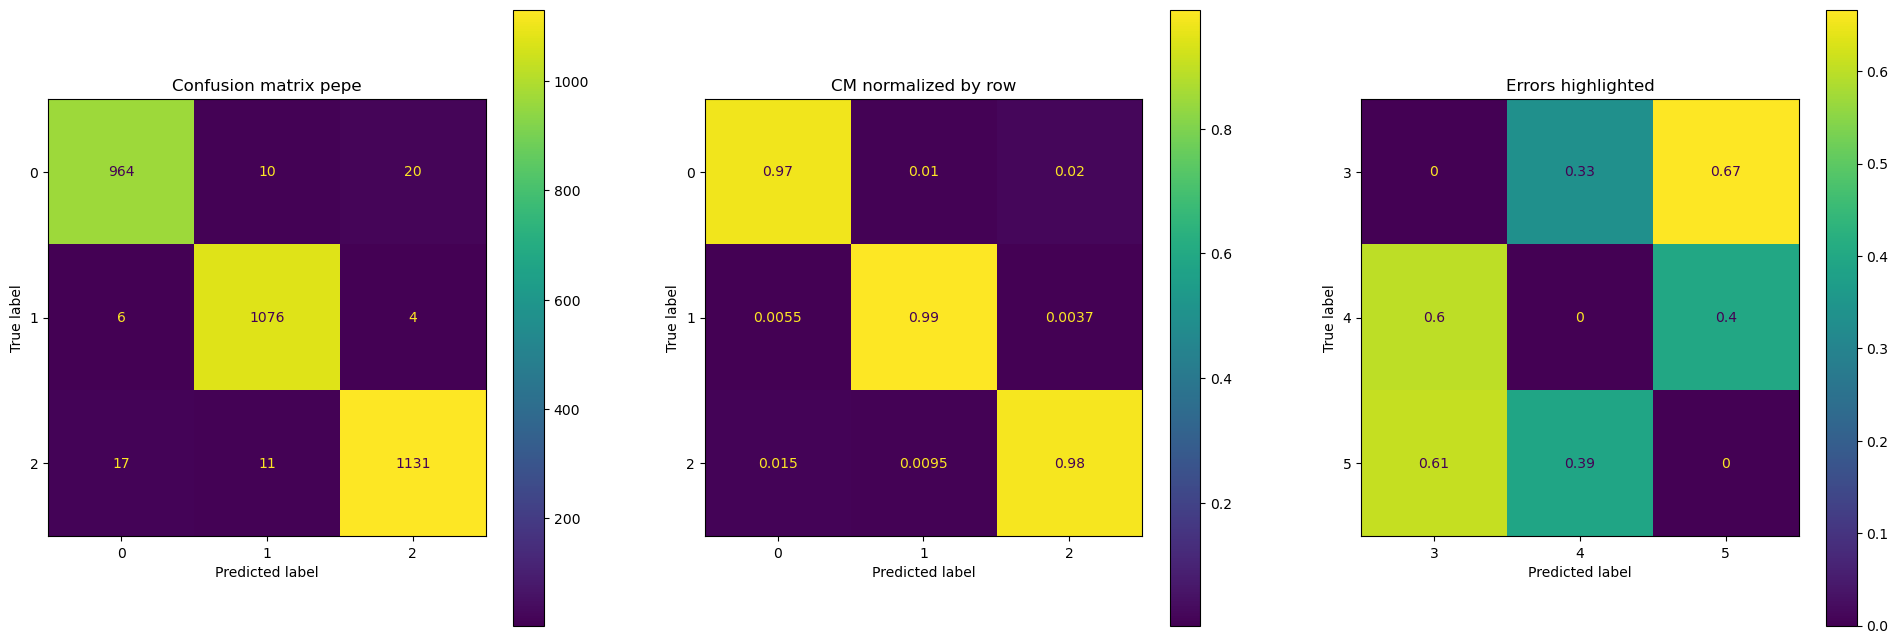

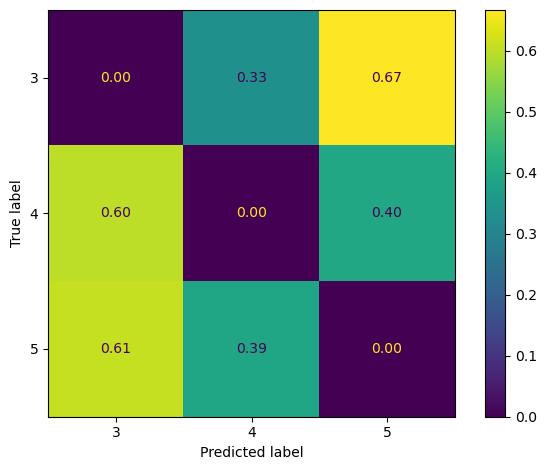

In [72]:

fig, axes = plt.subplots(1, 3, figsize=(24, 8))  # Crear una fila con 3 columnas para los gráficos

# Primera gráfica: Confusion matrix básica
ConfusionMatrixDisplay(confusion_matrix(y_train, y_train_pred)).plot(ax=axes[0], cmap="viridis")
axes[0].set_title("Confusion matrix pepe")

# Segunda gráfica: Confusion matrix normalizada
ConfusionMatrixDisplay(confusion_matrix(y_train, y_train_pred, normalize='true')).plot(ax=axes[1], cmap="viridis")
axes[1].set_title("CM normalized by row")

# Tercera gráfica: Confusion matrix con los errores resaltados
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".2f", sample_weight=sample_weight).plot(ax=axes[2], cmap="viridis")
axes[2].set_title("Errors highlighted")

# Mostrar todas las gráficas
plt.tight_layout()
plt.show()



In [60]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_train, y_train_pred, average='macro')
print(f'Precisión macro: {precision}')

# Calcular el recall
recall = recall_score(y_train, y_train_pred, average='macro')
print(f'Recall micro: {recall}')

# Calcular el F1-score
f1 = f1_score(y_train, y_train_pred, average='macro')
print(f'F1 Score macro: {f1}')

precision = precision_score(y_train, y_train_pred, average='micro')
print(f'Precisión micro: {precision}')

# Calcular el recall
recall = recall_score(y_train, y_train_pred, average='micro')
print(f'Recall micro: {recall}')

# Calcular el F1-score
f1 = f1_score(y_train, y_train_pred, average='micro')
print(f'F1 Score micro: {f1}')

precision = precision_score(y_train, y_train_pred, average='weighted')
print(f'Precisión weighted: {precision}')

# Calcular el recall
recall = recall_score(y_train, y_train_pred, average='weighted')
print(f'Recall weighted: {recall}')

# Calcular el F1-score
f1 = f1_score(y_train, y_train_pred, average='weighted')
print(f'F1 Score weighted: {f1}')

from sklearn.metrics import classification_report



Precisión macro: 0.980128756299394
Recall micro: 0.9796221661596887
F1 Score macro: 0.9798519878552924
Precisión micro: 0.9799320778017907
Recall micro: 0.9799320778017907
F1 Score micro: 0.9799320778017907
Precisión weighted: 0.9799531429054278
Recall weighted: 0.9799320778017907
F1 Score weighted: 0.9799202925431659


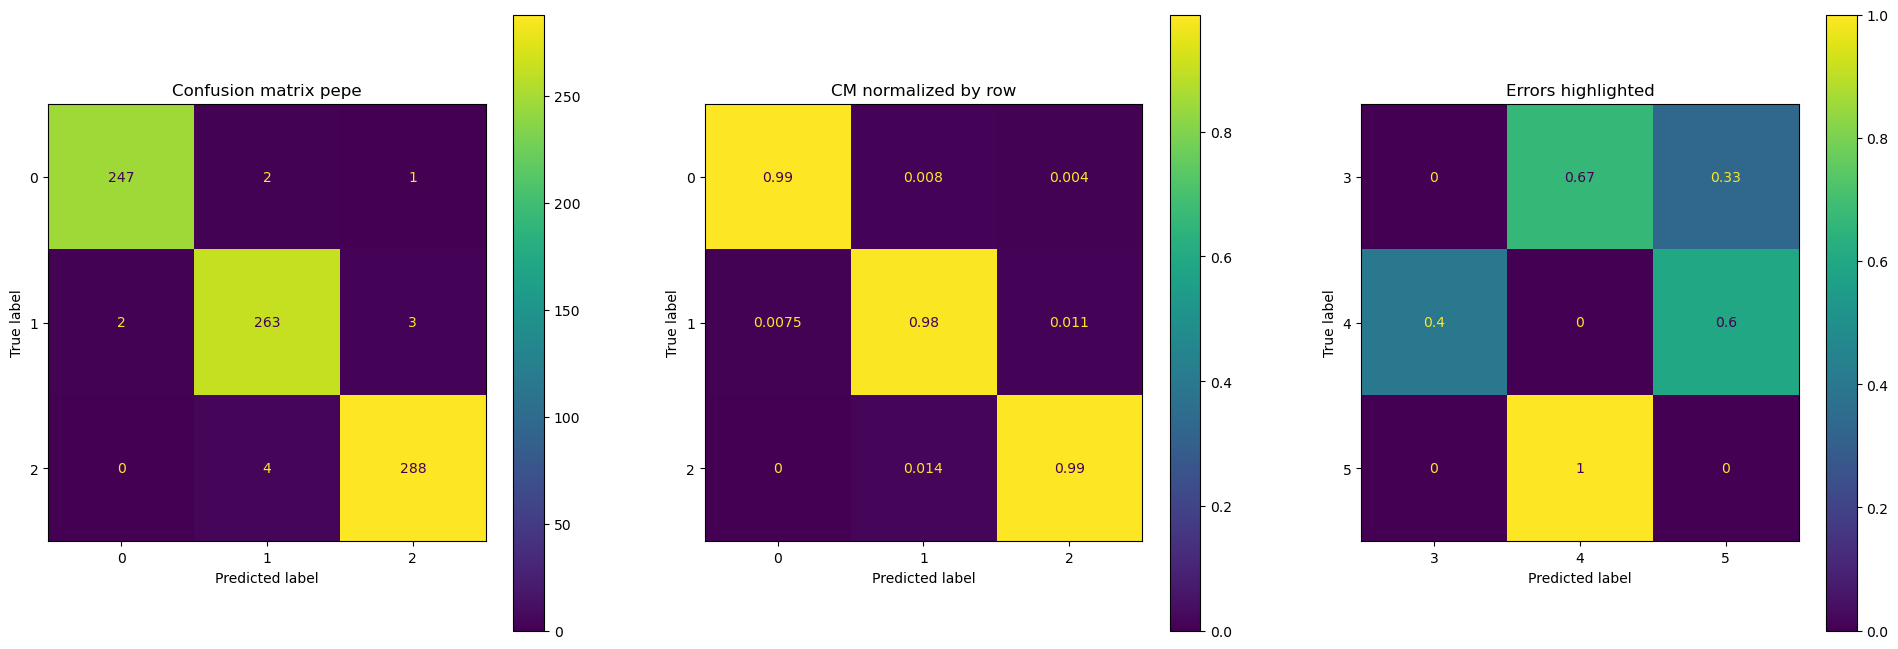

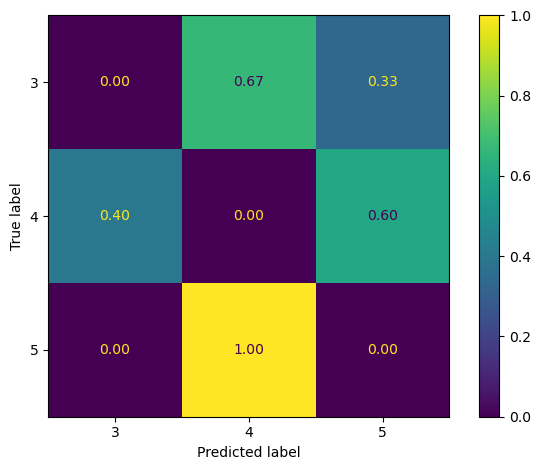

In [61]:
y_test_pred = pipeline.predict(x_test)
fig, axes = plt.subplots(1, 3, figsize=(24, 8))  # Crear una fila con 3 columnas para los gráficos
# ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred)).plot()
# plt.show()

ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred)).plot(ax=axes[0], cmap="viridis")
axes[0].set_title("Confusion matrix pepe")

# Segunda gráfica: Confusion matrix normalizada
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred, normalize='true')).plot(ax=axes[1], cmap="viridis")
axes[1].set_title("CM normalized by row")

# Tercera gráfica: Confusion matrix con los errores resaltados
sample_weight_test = (y_test_pred != y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, normalize="true", values_format=".2f", sample_weight=sample_weight_test).plot(ax=axes[2], cmap="viridis")
axes[2].set_title("Errors highlighted")

# Mostrar todas las gráficas
plt.tight_layout()

In [73]:
precision_test = precision_score(y_test, y_test_pred, average='macro')
print(f'Precisión test: {precision_test}')

# Calcular el recall
recall_test = recall_score(y_test, y_test_pred, average='macro')

print(f'Recall test: {recall_test}')

# Calcular el F1-score
f1_test = f1_score(y_test, y_test_pred, average='macro')

print(f'F1 Score test: {f1_test}')

presicion_test = precision_score(y_test, y_test_pred, average='micro')
print(f'Precisión micro: {presicion_test}')

# Calcular el recall
recall_test = recall_score(y_test, y_test_pred, average='micro')
print(f'Recall micro: {recall_test}')

# Calcular el F1-score
f1_test = f1_score(y_test, y_test_pred, average='micro')
print(f'F1 Score micro: {f1_test}')

precision_test = precision_score(y_test, y_test_pred, average='weighted')
print(f'Precisión weighted: {precision_test}')

# Calcular el recall
recall_test = recall_score(y_test, y_test_pred, average='weighted')
print(f'Recall weighted: {recall_test}')

# Calcular el F1-score
f1_test = f1_score(y_test, y_test_pred, average='weighted')
print(f'F1 Score weighted: {f1_test}')


Precisión test: 0.9853214695450676
Recall test: 0.9852148844817011
F1 Score test: 0.9852657194868977
Precisión micro: 0.9851851851851852
Recall micro: 0.9851851851851852
F1 Score micro: 0.9851851851851852
Precisión weighted: 0.985202805807654
Recall weighted: 0.9851851851851852
F1 Score weighted: 0.9851916445254579


In [92]:
df_2 = pd.read_csv(file2, encoding='UTF-8')
df_prediccion = df_2.copy()
df_prediccion["Textos_espanol"] = df_prediccion["Textos_espanol"].apply(corregir_tildes_texto)
df_prediccion['Textos_espanol'] = df_prediccion['Textos_espanol'].apply(clean_text_lemma)
df_prediccion.head(1)






,Textos_espanol,sdg
0,examinar contribucion universidad institución educacion terciaria desarrollo capital humano competencia transferencia tecnologaa innovacion empresarial desarrollo social cultural medioambiental creacion capacidad regional proceso revision facilitar creacion asociación ciudad región reunir institución educacion terciaria organismo publico privado identificar objetivo estrategico trabajar junto alcanzar él complementar revisión llevar cabo region transfronterizo mexicoestado unido importancia estrategico economico leon region paso norte recientemente sur arizona mil sonora,NaN


In [93]:
df_2["sdg"] = pipeline.predict(df_prediccion)
df_2.to_csv('TestODScat_345_modelo2.csv', index=False)

print(df_2["sdg"])


0      4
1      3
2      4
3      3
4      4
5      4
6      4
7      3
8      4
9      4
10     4
11     3
12     3
13     3
14     3
15     3
16     4
17     4
18     3
19     4
20     3
21     4
22     3
23     3
24     4
25     3
26     4
27     3
28     4
29     4
30     3
31     4
32     3
33     4
34     3
35     4
36     3
37     4
38     3
39     4
40     4
41     4
42     4
43     4
44     3
45     4
46     3
47     4
48     3
49     3
50     4
51     3
52     4
53     4
54     4
55     3
56     3
57     4
58     3
59     4
60     4
61     3
62     3
63     3
64     5
65     3
66     3
67     3
68     5
69     5
70     3
71     4
72     4
73     4
74     4
75     5
76     4
77     5
78     4
79     4
80     3
81     3
82     3
83     5
84     4
85     4
86     4
87     4
88     4
89     5
90     5
91     4
92     4
93     5
94     5
95     5
96     5
97     4
98     5
99     4
100    5
101    3
102    5
103    3
104    4
105    5
106    5
107    3
108    4
109    4
110    4
1